# BBH Disks (Cowling with 12 levels of refinement)

In [1]:
using Plots
include("../../Utils/misc.jl")

Main.Misc

## Scaling

In [2]:
patt_dirss = [
    ([
        (r"Cow_L12_G64-N\d+-MPI\d+_r0000", "G64"),
        (r"Cow_L12_G128-N\d+-MPI\d+_r0000", "G128"),
        (r"Cow_L12_G256-N\d+-MPI\d+_r0000", "G256"),
        #(r"Cow_L12_G256x320x96-N\d+-MPI\d+_r0000", "G256x320x96"),
        #(r"Cow_L12_GnGPU-N\d+-MPI\d+_r0000", "GnGPU"),
        (r"Cow_L12_Gtheory-N\d+-MPI\d+_r0000", "Gtheory"),
    ], "../data/bbhDisk/bbhDisk-n256-v1", :cross),
    ([
        (r"Cow_L12_G64-N\d+-MPI\d+_r0000", "G64"),
        (r"Cow_L12_G128-N\d+-MPI\d+_r0000", "G128"),
        (r"Cow_L12_G256-N\d+-MPI\d+_r0000", "G256"),
        #(r"Cow_L12_Gtheory-N\d+-MPI\d+_r0000", "Gtheory"),
    ], "../data/bbhDisk/bbhDisk-n256-v2", :xcross),
    ([
        #(r"Cow_L12_G64-N\d+-MPI\d+_r0000", "G64"),
        (r"Cow_L12_G128-N\d+-MPI\d+_r0000", "G128"),
        (r"Cow_L12_G256-N\d+-MPI\d+_r0000", "G256"),
        #(r"Cow_L12_Gtheory-N\d+-MPI\d+_r0000", "Gtheory"),
    ], "../data/bbhDisk/bbhDisk-n320", :star4),
];

### Strong Scaling (M/day)

G64: [230.49884742314683, 345.76169690752715, 434.76824515069785, 412.3098276338026]
G128: [265.00912587578864, 376.5848621163997, 452.4414323484922, 425.77149591584924]
G256: [247.70784419419277, 360.3532857115918, 418.1459975984331, 410.99946525876027]
Gtheory: [268.841604886095, 371.20334812115226, 440.344847360272, 456.67750907462397]
G64: [220.31947851090146, 325.16133363231086, 405.6088188370744, 420.123989280564]
G128: [236.89499438329608, 356.942941071663, 440.9108364505256]
G256: [246.76763875623453, 373.2591607475137, 430.24309814508166]
G128: [223.70747593500906, 295.7248573101065, 364.77906068825314]
G256: [246.81685870610642, 245.52381052953945, 285.9143232623172]


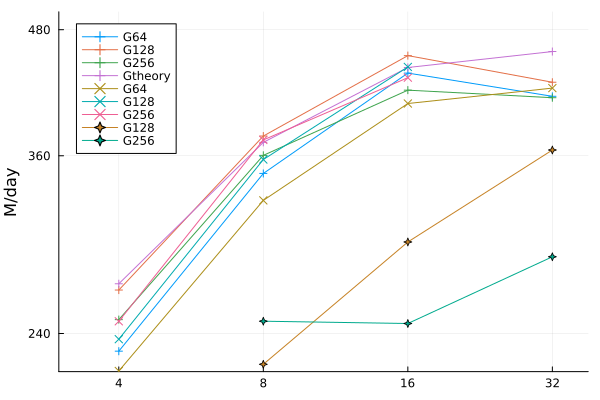

In [3]:
let plt = plot(ylabel="M/day", xscale=:log10, yscale=:log10, xlim=(3, 38), ylim=(220, 500), legend=:topleft)
    xs = [4, 8, 16, 32]
    xticks!(plt, xs, [string(n) for n in xs])
    ys = [240, 360, 480]
    yticks!(plt, ys, [string(n) for n in ys])

    # Process datasets
    for (patterns, parent_dir, mark) in patt_dirss
        # Load averages for the given patterns and directory
        (dats, labs) = Misc.load_avgs(patterns, parent_dir; option="TotalComputeTime")

        # Iterate through the loaded datasets
        for (i, dat) in enumerate(dats)
            plot!(plt, dat[1], dat[2], label=labs[i], marker=mark)
            println("$(labs[i]): ", dat[2])
        end

        ## Add the "ideal" reference plot
        #x_ref, y_ref = dats[end]  # choose the last dataset as the reference
        #ideal_y = y_ref[1] .* (x_ref ./ x_ref[1])  # compute the ideal scaling line
        #plot!(plt, x_ref, ideal_y; label="ideal", linestyle=:dash, color=:red)
    end
    display(plt)
end

### String Scaling (Zcs/sec)

G64: [3.19645625e7, 4.78995125e7, 6.0250559375e7, 5.718725e7]
G128: [3.67014125e7, 5.218935625e7, 6.26027625e7, 5.9090740625e7]
G256: [3.4458046875e7, 4.99724e7, 5.867264375e7, 5.7015859375e7]
Gtheory: [3.72947875e7, 5.154395e7, 6.098025e7, 6.3349903125e7]
G64: [3.2672684375e7, 4.83809125e7, 6.02908125e7, 6.2391615625e7]
G128: [3.52576375e7, 5.3022140625e7, 6.5473040625e7]
G256: [3.6645628125e7, 5.54640125e7, 6.3895525e7]
G128: [5.696583125e7, 7.5337040625e7, 9.3074975e7]
G256: [6.2871653125e7, 7.5392253125e7, 8.130581875e7]


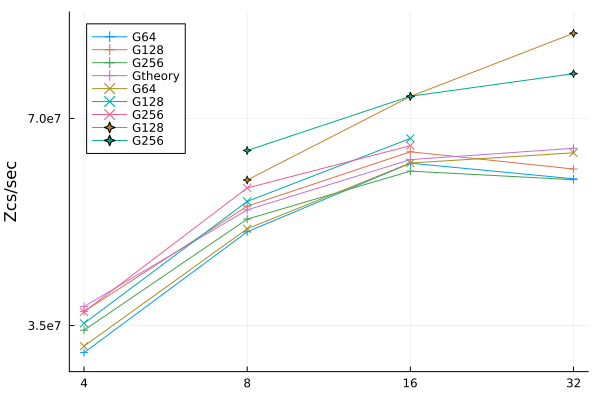

In [6]:
let plt = plot(ylabel="Zcs/sec", xscale=:log10, yscale=:log10, ylim=(3e7, 1e8))
    xs = [4, 8, 16, 32]
    xticks!(plt, xs, [string(n) for n in xs])
    ys = [3.5e7, 7e7]
    yticks!(plt, ys, [string(n) for n in ys])
    
    # Process datasets
    for (patterns, parent_dir, mark) in patt_dirss
        # Load averages for the given patterns and directory
        (dats, labs) = Misc.load_avgs(patterns, parent_dir; option="ZcsPerSecond")

        # Iterate through the loaded datasets
        for (i, dat) in enumerate(dats)
            plot!(plt, dat[1], dat[2], label=labs[i], marker=mark)
            println("$(labs[i]): ", dat[2])
        end

        ## Add the "ideal" reference plot
        #x_ref, y_ref = dats[end]  # choose the last dataset as the reference
        #ideal_y = y_ref[1] .* (x_ref ./ x_ref[1])  # compute the ideal scaling line
        #plot!(plt, x_ref, ideal_y; label="ideal", linestyle=:dash, color=:red)
    end
    display(plt)
end

## Speed

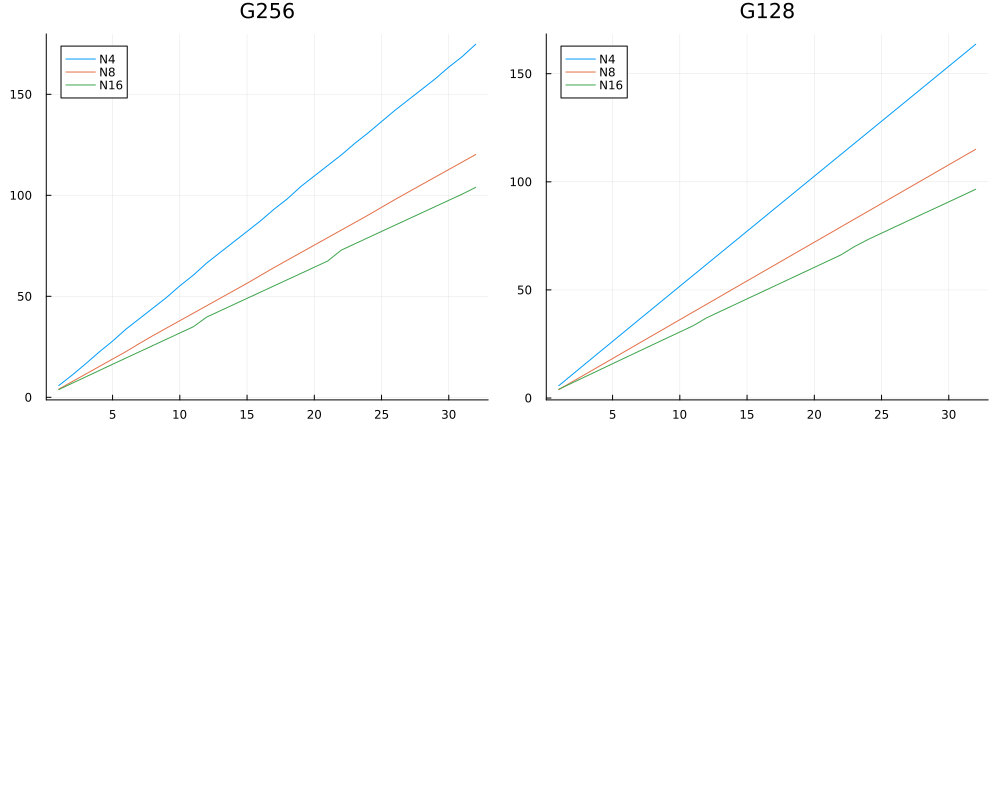

In [5]:
let dirss = [
    ([
        ("Cow_L12_G256-N4-MPI4_r0000/stdout.txt", "N4"),
        ("Cow_L12_G256-N8-MPI8_r0000/stdout.txt", "N8"),
        ("Cow_L12_G256-N16-MPI16_r0000/stdout.txt", "N16"),
    ], "G256"),
    ([
        ("Cow_L12_G128-N4-MPI4_r0000/stdout.txt", "N4"),
        ("Cow_L12_G128-N8-MPI8_r0000/stdout.txt", "N8"),
        ("Cow_L12_G128-N16-MPI16_r0000/stdout.txt", "N16"),
    ], "G128"),
    #([
    #    ("Cow_L12_G64-N4-MPI4_r0000/stdout.txt", "N4"),
    #    ("Cow_L12_G64-N8-MPI8_r0000/stdout.txt", "N8"),
    #    ("Cow_L12_G64-N16-MPI16_r0000/stdout.txt", "N16"),
    #], "G64"),
    ]
    # Plot
    plts = []
    for dirs in dirss
        (dats, labs) = Misc.load_data(dirs[1], "../data/bbhDisk/bbhDisk-n256-v1", "TotalComputeTime")
        #
        tit = dirs[2]
        plt = plot(title = "$tit")
        for (i, dat) in enumerate(dats)
            plot!(plt, dat[1], dat[3], label=labs[i])
        end
        push!(plts, plt)
    end

    plt_grid = plot(plts..., layout=(2, 2), size=(1000, 800))
    display(plt_grid)
end